# Random forest Classifer

# Import Data

**1.Importing necessary libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn_pandas
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from sklearn.ensemble import RandomForestClassifier

**2.Importing Data File**

In [2]:
df=pd.read_csv('fake_job_postings.csv')
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

<Axes: >

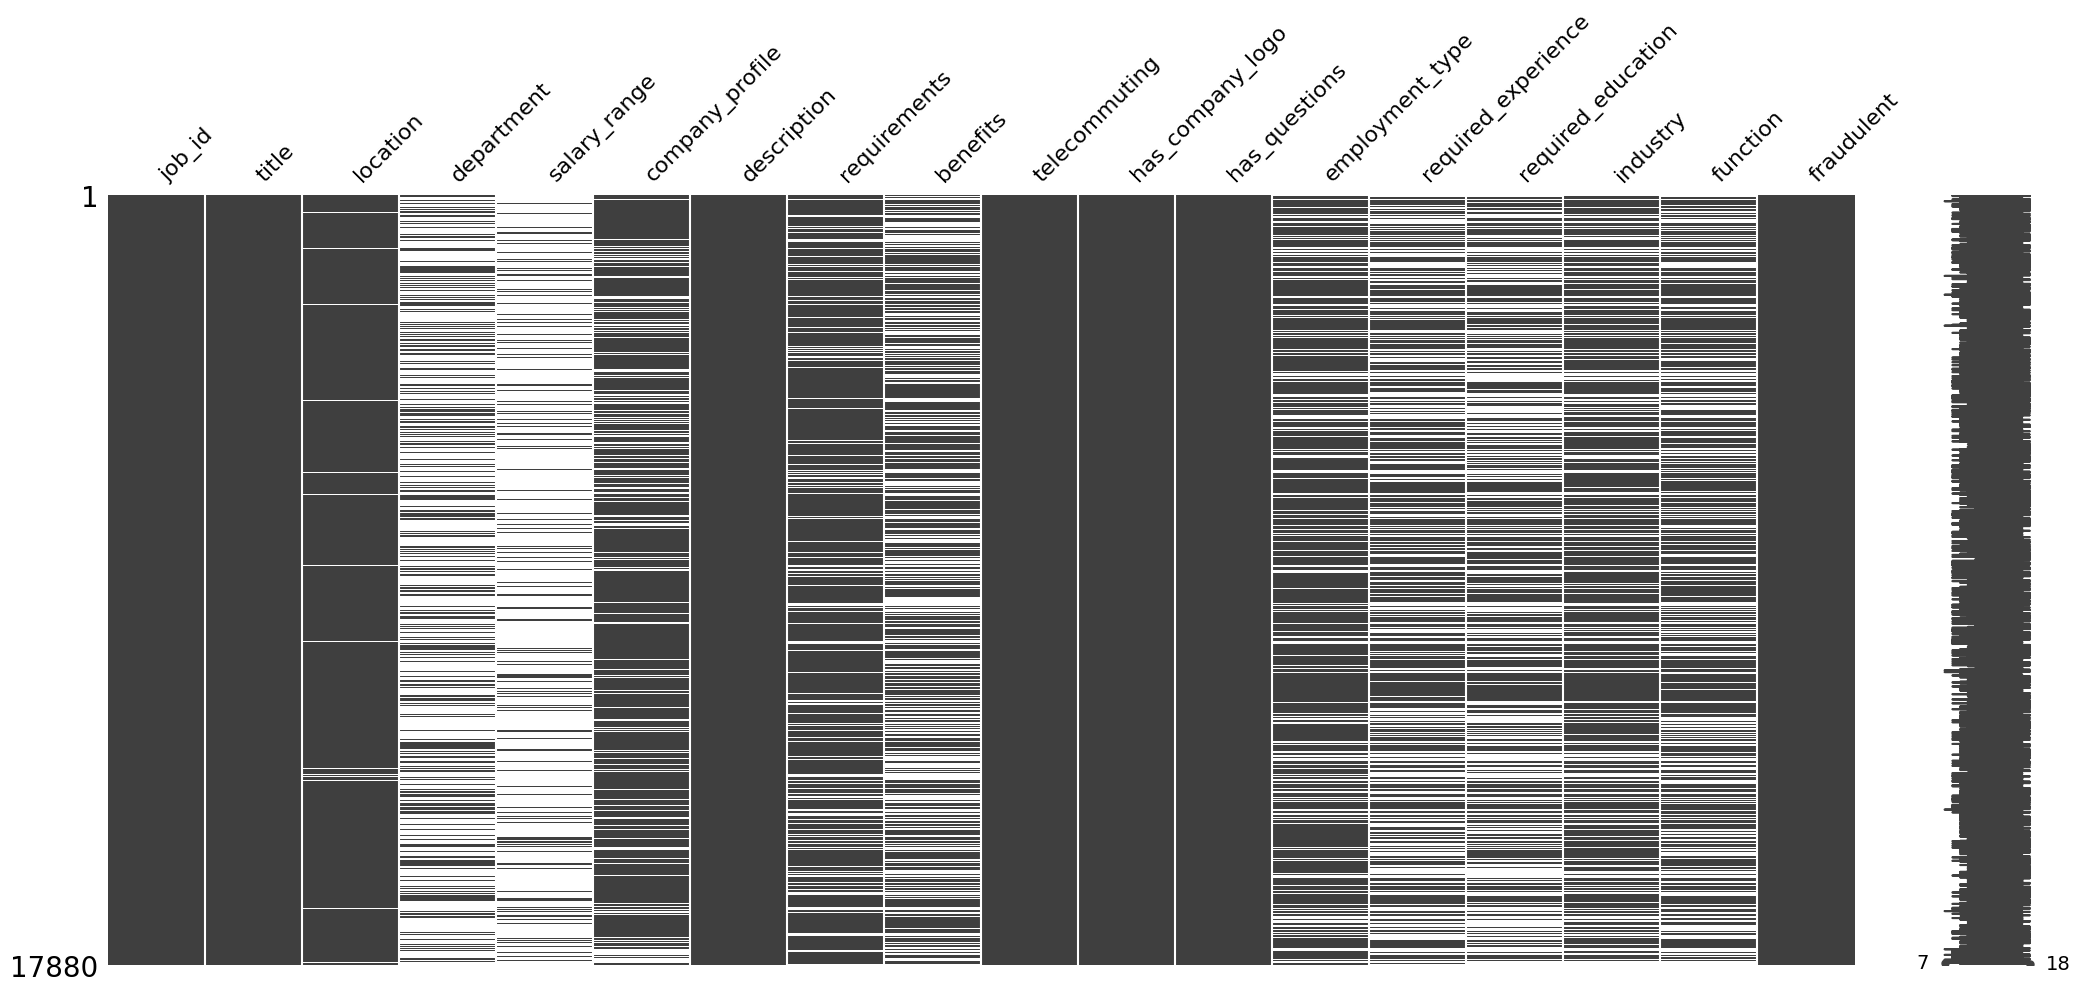

In [3]:
missingno.matrix(df)

# Data Visualization

 **Visual representation of the distribution of fraudulent and non-fraudulent job postings**

C:\Users\ravin\AppData\Local\Temp\ipykernel_2824\630375213.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraudulent', y='count', data=fraudulent_counts, palette='viridis')


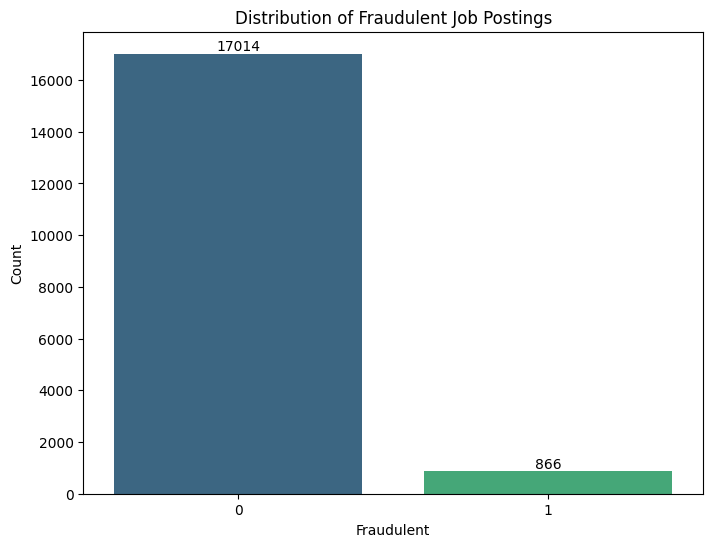

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


fraudulent_counts = df['fraudulent'].value_counts().reset_index()


fraudulent_counts.columns = ['fraudulent', 'count']


fraudulent_counts = fraudulent_counts.sort_values(by='count', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='fraudulent', y='count', data=fraudulent_counts, palette='viridis')
plt.title('Distribution of Fraudulent Job Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Count')


for index, value in enumerate(fraudulent_counts['count']):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

plt.show()


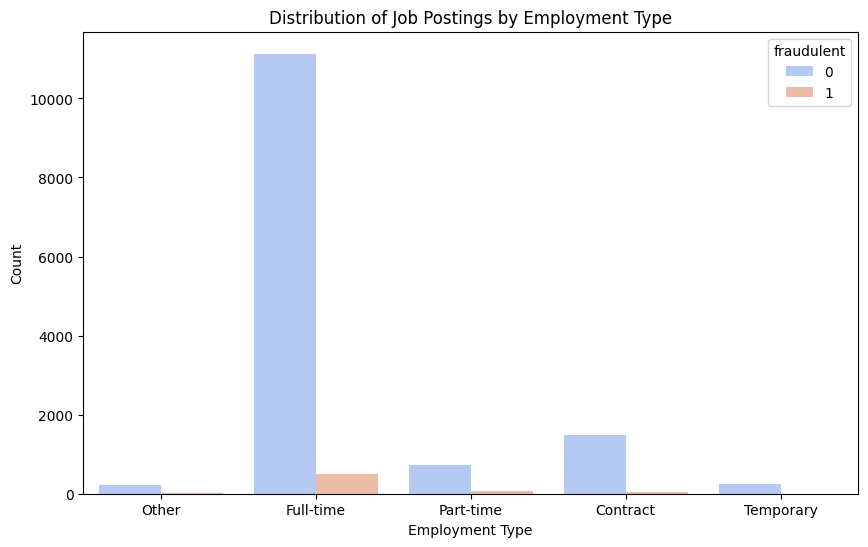

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', data=df, hue='fraudulent', palette='coolwarm')
plt.title('Distribution of Job Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()


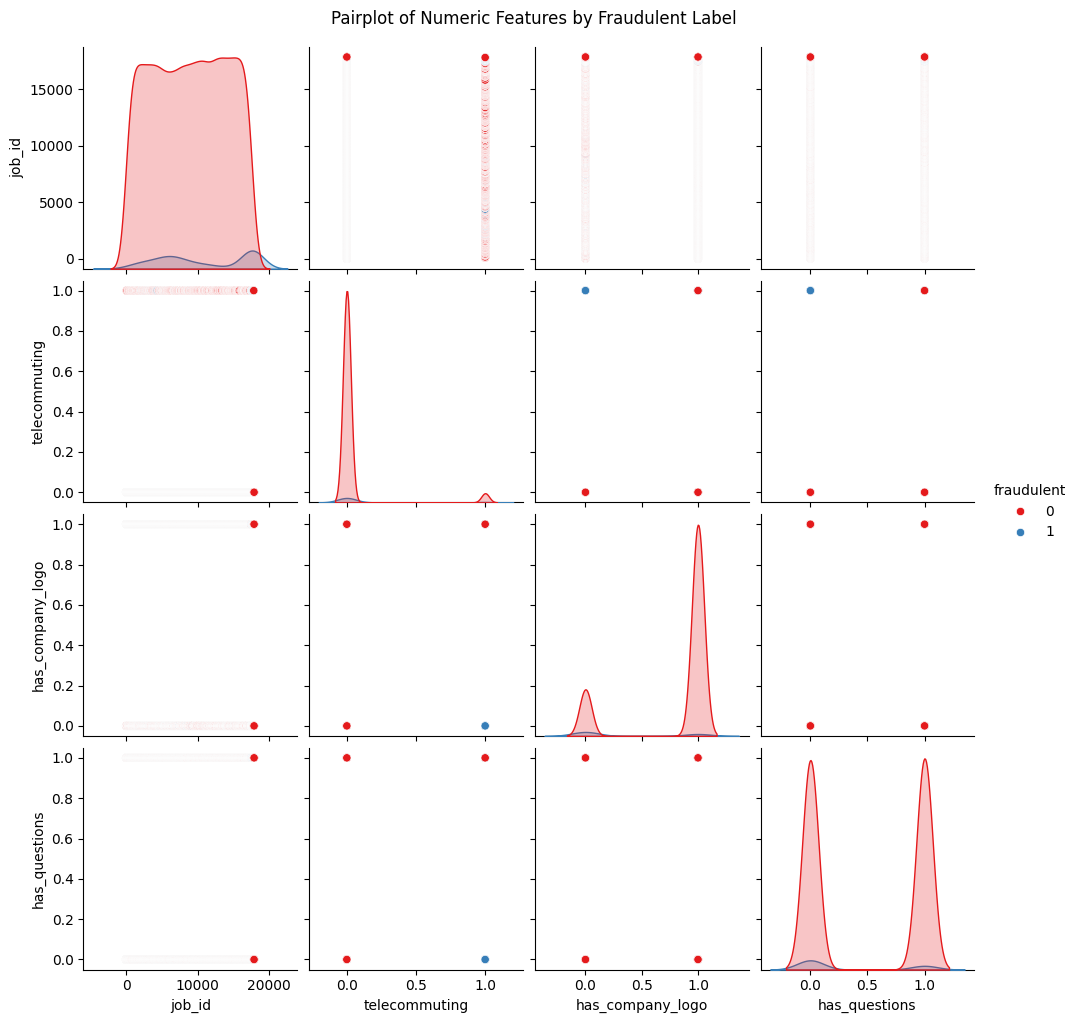

In [5]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[numeric_columns], hue='fraudulent', palette='Set1')
plt.suptitle('Pairplot of Numeric Features by Fraudulent Label', y=1.02)
plt.show()


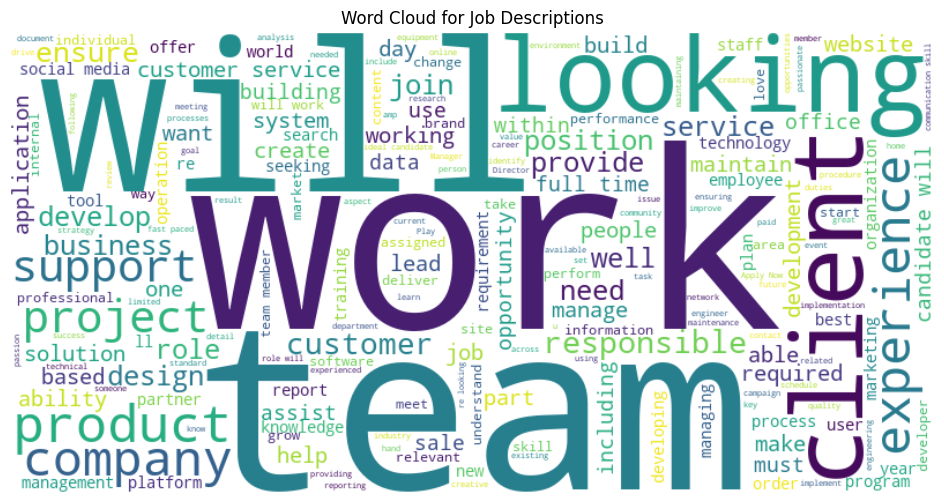

In [6]:
from wordcloud import WordCloud


text = ' '.join(df['description'].astype(str))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()


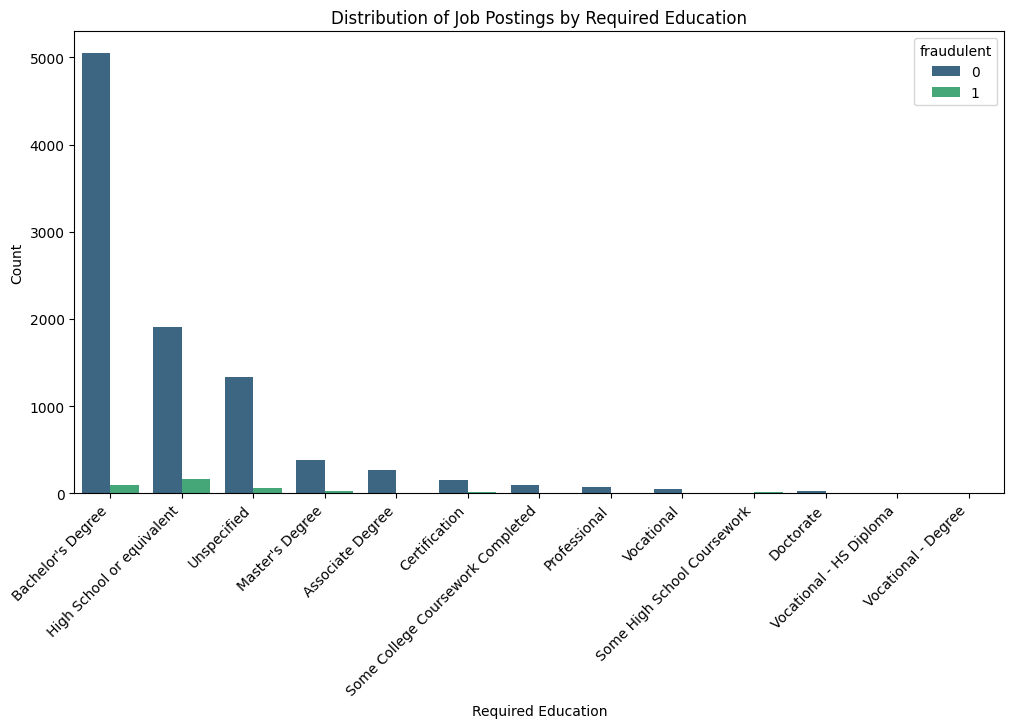

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='required_education', data=df, hue='fraudulent', palette='viridis', order=df['required_education'].value_counts().index)
plt.title('Distribution of Job Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


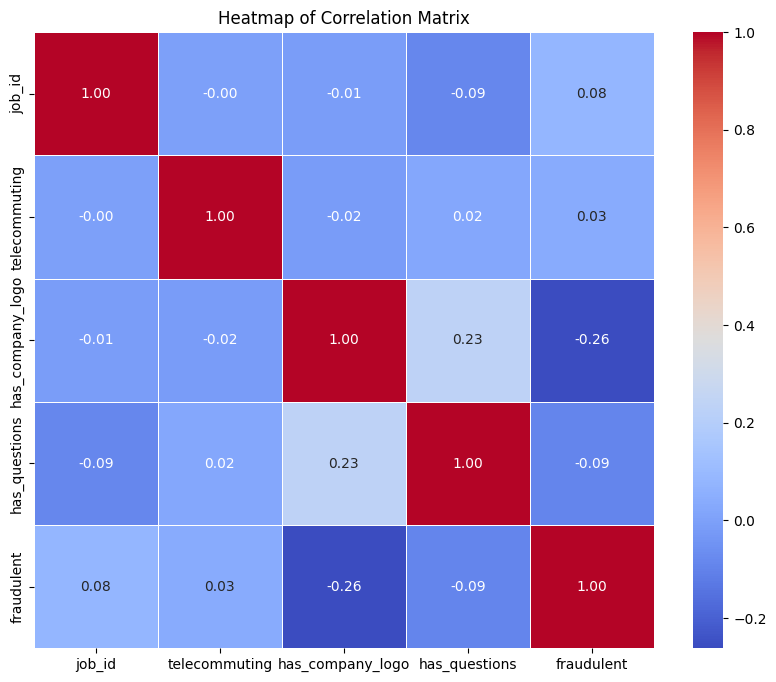

In [12]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


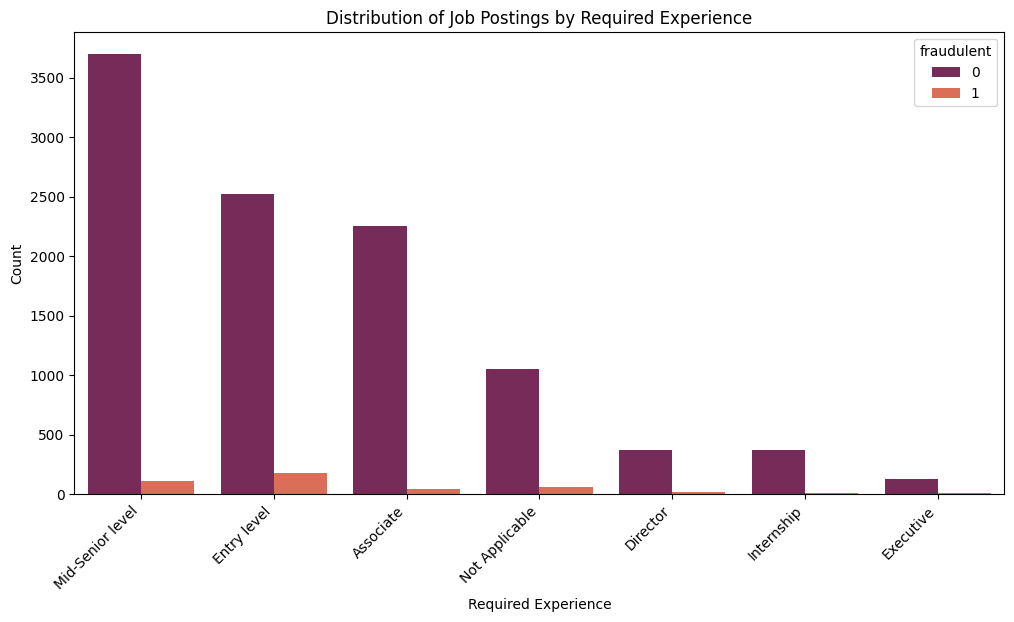

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='required_experience', data=df, hue='fraudulent', palette='rocket', order=df['required_experience'].value_counts().index)
plt.title('Distribution of Job Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Fraudlent jobs as per STEM and NON-STEM FIELD**

In [4]:
stem = ['Information Technology', 'Engineering', 'Data Analyst', 'Science', 'Business Analyst', 'Quality Assurance']
non_stem = ['Sales', 'Customer Service', 'Marketing', 'Administrative', 'Design', 'Human Resources']
df_stem = df[df['function'].isin(stem)]
df_non_stem = df[df['function'].isin(non_stem)]


C:\Users\ravin\AppData\Local\Temp\ipykernel_18772\248575540.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts_stem, palette=['#66b3ff', '#99ff99'])


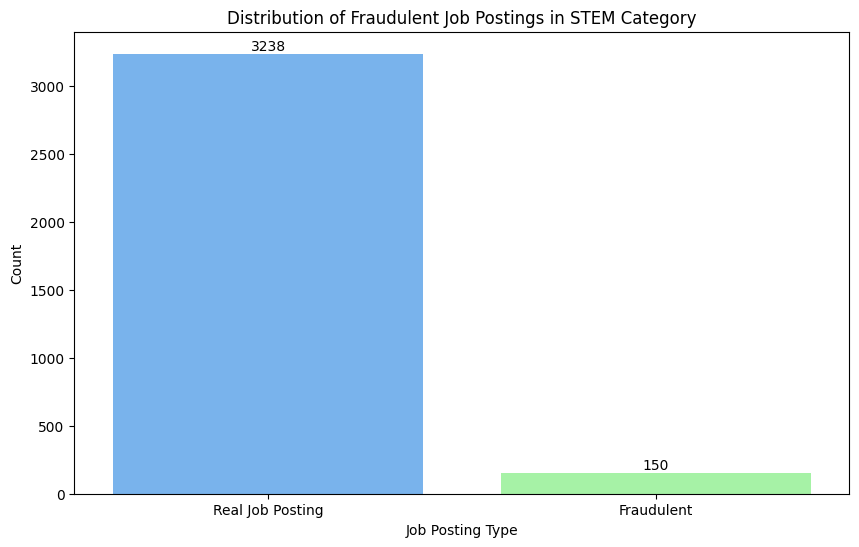

C:\Users\ravin\AppData\Local\Temp\ipykernel_18772\248575540.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts_non_stem, palette=['#66b3ff', '#99ff99'])


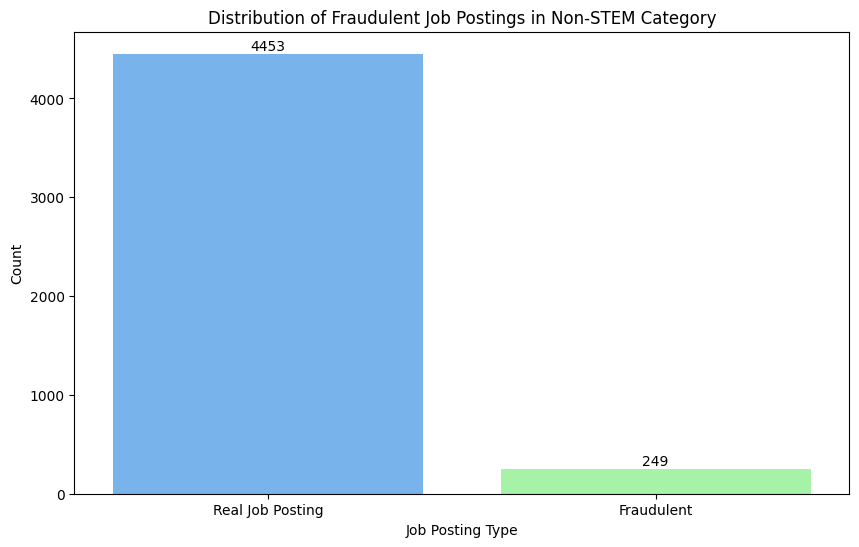

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


stem_real_count = df_stem['fraudulent'].value_counts()[0]
stem_fraud_count = df_stem['fraudulent'].value_counts()[1]

non_stem_real_count = df_non_stem['fraudulent'].value_counts()[0]
non_stem_fraud_count = df_non_stem['fraudulent'].value_counts()[1]

categories = ['Real Job Posting', 'Fraudulent']
counts_stem = [stem_real_count, stem_fraud_count]
counts_non_stem = [non_stem_real_count, non_stem_fraud_count]


plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts_stem, palette=['#66b3ff', '#99ff99'])
plt.title('Distribution of Fraudulent Job Postings in STEM Category')
plt.xlabel('Job Posting Type')
plt.ylabel('Count')


for i, count in enumerate(counts_stem):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts_non_stem, palette=['#66b3ff', '#99ff99'])
plt.title('Distribution of Fraudulent Job Postings in Non-STEM Category')
plt.xlabel('Job Posting Type')
plt.ylabel('Count')


for i, count in enumerate(counts_non_stem):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()


**Separating features into numerical and categorical subsets**

In [6]:
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]

**Top 10 Industries and Business Functions Represented in the Dataset**

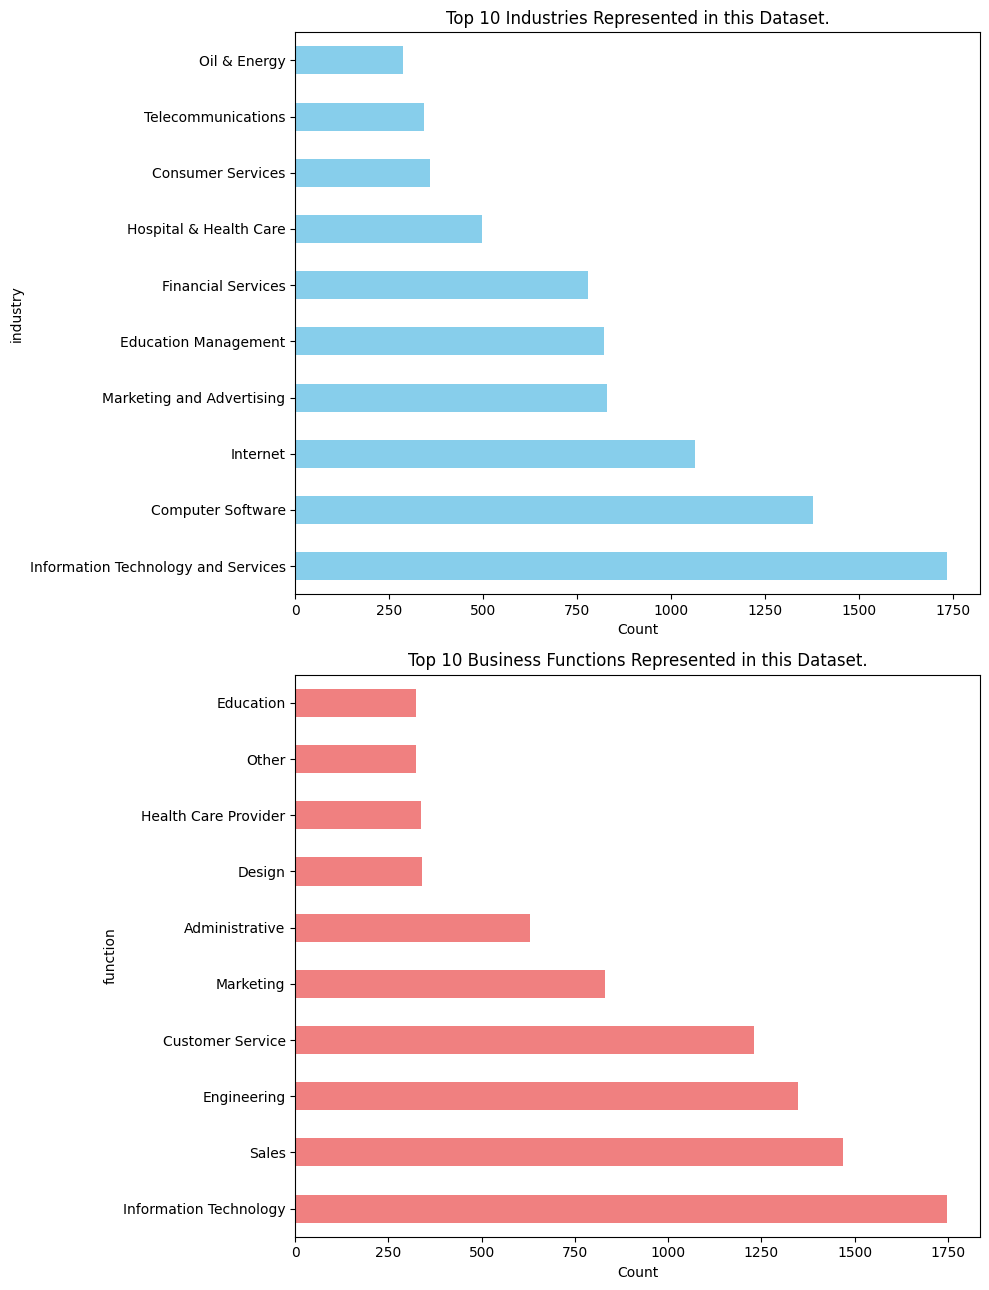

In [7]:
industry_counts = df.industry.value_counts()[:10]
function_counts = df.function.value_counts()[:10]

plt.figure(figsize=(10, 13))

plt.subplot(2, 1, 1)
industry_counts.plot(kind='barh', color='skyblue')
plt.title('Top 10 Industries Represented in this Dataset.')
plt.xlabel('Count')

plt.subplot(2, 1, 2)
function_counts.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Business Functions Represented in this Dataset.')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


**Displaying potential outliers**

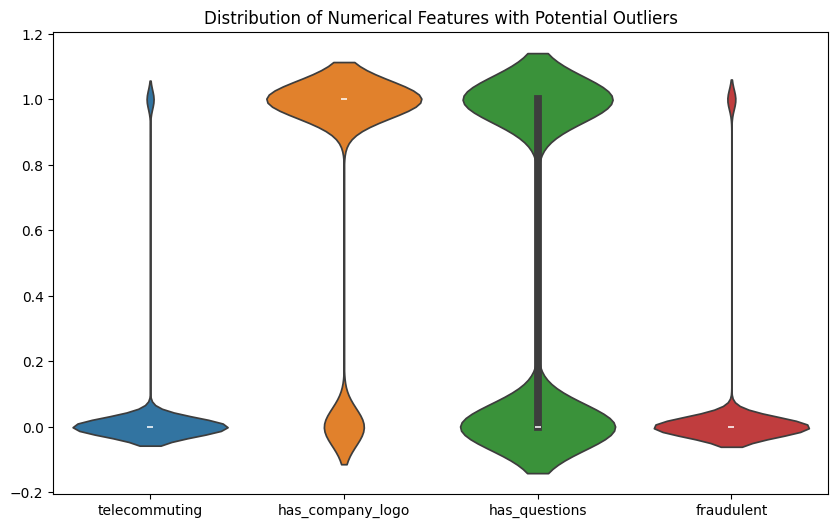

In [8]:
plt.figure(figsize=[10,6])
sns.violinplot(data=df_num)
plt.title('Distribution of Numerical Features with Potential Outliers')
plt.show()


**Data Filtering Based on Telecommuting, Fraudulent, and Company Logo Criteria**

In [9]:

df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN
...,...,...,...,...,...
17872,0,1,0,0,NaN
17873,0,1,0,0,NaN
17875,0,1,1,0,NaN
17876,0,1,1,0,NaN


In [10]:

df.dropna(axis= 0, how= 'any', inplace=True)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0


# Data Preprocessing and Model Preparation for Fraudulent Job Postings Classification


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer


df['department'] = df['department'].fillna(df['department'].mode()[0])

data_cat_imp = SimpleImputer(strategy="constant", fill_value="Missing")
cat_imp_feature = ["title", "location", "department", "salary_range", "company_profile", "description", "requirements",
                   "benefits", "employment_type", "required_experience", "required_education", "industry", "function"]

data_num_imp = SimpleImputer(strategy="constant", fill_value=None)
num_imp_feature = ["job_id", "telecommuting", "has_company_logo", "has_questions", "fraudulent"]


data_imp_trans = ColumnTransformer([("data_cat_imp", data_cat_imp, cat_imp_feature),
                                    ("data_num_imp", data_num_imp, num_imp_feature)])


transformed_data = data_imp_trans.fit_transform(df)


df_job_transformed_data = pd.DataFrame(transformed_data, columns=["title", "location", "department", "salary_range",
                                                                   "company_profile", "description", "requirements",
                                                                   "benefits", "employment_type", "required_experience",
                                                                   "required_education", "industry", "function", "job_id",
                                                                   "telecommuting", "has_company_logo", "has_questions",
                                                                   "fraudulent"])


X_trans = df_job_transformed_data.drop("fraudulent", axis=1)
y_trans = df_job_transformed_data.fraudulent
y_trans = y_trans.astype('int')


one_hot = OneHotEncoder()
clf_trans = ColumnTransformer([("one_hot", one_hot, cat_imp_feature)], remainder="passthrough")
X_trans_fin = clf_trans.fit_transform(X_trans)


X_train, X_test, y_train, y_test = train_test_split(X_trans_fin, y_trans, test_size=0.25, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rfm=RandomForestClassifier(random_state=42)
model_rfm.fit(X_train,y_train)
y_pred_rfm = model_rfm.predict(X_test)
rfc_accuracy = model_rfm.score(X_test, y_test)
print(f"Fake Job Random Forest Model Classification  Accuracy : {rfc_accuracy*100:.2f}%")

Fake Job Random Forest Model Classification  Accuracy : 99.48%


In [44]:
from sklearn.ensemble import RandomForestClassifier


n_trees = [10, 50, 100, 200, 300]

for i in n_trees:
    ran_for = RandomForestClassifier(n_estimators=i)
    ran_for.fit(X_train, y_train)
    pred = ran_for.predict(X_test)

    print('Number of Trees: {}'.format(i))
    
    
    correct_pred = sum(j == k for j, k in zip(y_test, pred))
    accuracy = correct_pred / len(y_test) * 100
    
    print('Correct Predictions: {:.2f}%'.format(accuracy))
    print('-------------------------------------------------------------------')


Number of Trees: 10
Correct Predictions: 98.45%
-------------------------------------------------------------------
Number of Trees: 50
Correct Predictions: 99.48%
-------------------------------------------------------------------
Number of Trees: 100
Correct Predictions: 99.48%
-------------------------------------------------------------------
Number of Trees: 200
Correct Predictions: 99.48%
-------------------------------------------------------------------
Number of Trees: 300
Correct Predictions: 99.48%
-------------------------------------------------------------------


**What are the top keywords that are more likely to exist in fake job ads according to the trained classifier?**

Top Keywords and Their Importances:
                                                Feature  Importance
1521  one_hot__company_profile_The Accion  story beg...    0.046404
1396  one_hot__company_profile_As the industry’s lar...    0.031642
3448  one_hot__required_education_High School or equ...    0.024894
721               one_hot__location_US, CA, Bakersfield    0.021175
987                    one_hot__department_Oil & Energy    0.020110
801                    one_hot__location_US, TX, Austin    0.020085
799                    one_hot__location_US, TX, AUSTIN    0.017282
3353  one_hot__benefits_Weekly pay, PTO, Paid Holida...    0.016138
3559                                  remainder__job_id    0.013897
3530                 one_hot__function_Customer Service    0.013628


C:\Users\ravin\AppData\Local\Temp\ipykernel_21648\2554550266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


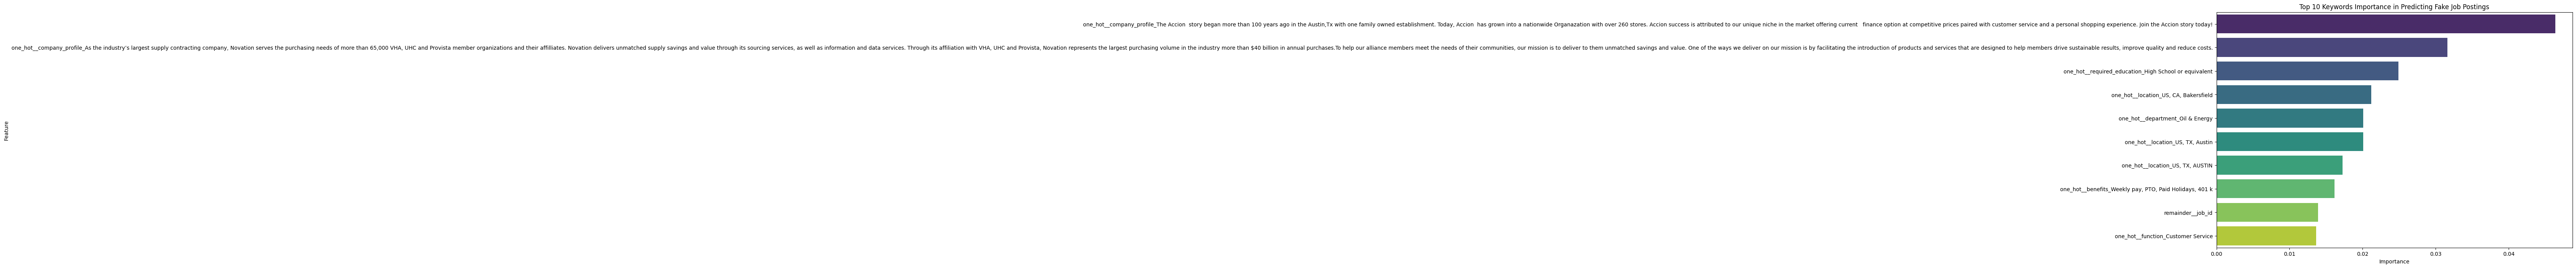

In [13]:

feature_importances = model_rfm.feature_importances_


feature_names = clf_trans.get_feature_names_out(X_trans.columns)


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("Top Keywords and Their Importances:")
print(feature_importance_df.head(10))


import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Importance in Predicting Fake Job Postings')
plt.show()


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


precision_rfc = precision_score(y_test, y_pred_rfm)
recall_rfc = recall_score(y_test, y_pred_rfm)
f1_rfc = f1_score(y_test, y_pred_rfm)


conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfm)


class_report_rfc = classification_report(y_test, y_pred_rfm)


print(f"Random Forest Model Classification Accuracy: {rfc_accuracy*100:.2f}%")
print(f"Precision: {precision_rfc:.2f}")
print(f"Recall: {recall_rfc:.2f}")
print(f"F1 Score: {f1_rfc:.2f}")


print("\nConfusion Matrix:")
print(conf_matrix_rfc)


print("\nClassification Report:")
print(class_report_rfc)


Random Forest Model Classification Accuracy: 99.48%
Precision: 1.00
Recall: 0.93
F1 Score: 0.96

Confusion Matrix:
[[180   0]
 [  1  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       180
           1       1.00      0.93      0.96        14

    accuracy                           0.99       194
   macro avg       1.00      0.96      0.98       194
weighted avg       0.99      0.99      0.99       194



# Decision Tree Classifer & Naive Bayes

# Implementation

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
import pandas as pd
import os
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('fake_job_postings.csv')
# Drop unnecessary columns
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'], axis=1, inplace=True)
data.fillna(' ', inplace=True)

data['country'] = data.location.apply(lambda x: x.split(',')[0])

country = dict(data.country.value_counts()[:11])
del country[' ']

experience = dict(data.required_experience.value_counts()[:11])
del experience[' ']

department1 = dict(data.department.value_counts()[:11])
del department1[' ']



In [17]:

data['text'] = data['title'] + ' ' + data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' '+ data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['industry']


data.drop(['title', 'location', 'department', 'company_profile', 'description', 
           'requirements', 'benefits', 'employment_type', 'required_experience', 
           'required_education', 'industry', 'function', 'country'], axis=1, inplace=True)


In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))


data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fraudulent'], test_size=0.3)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)


nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_nb = nb.predict(X_test_dtm)


In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_dtm, y_train)
y_pred_dt = dt.predict(X_test_dtm)


In [32]:
# Example usage of the trained model for prediction
input_text1 = ["Elite Environmental Group LLC is hiring general laborers for temporary positions in construction and housekeeping. Pay: $9.00 - $13.00 per hour. Contact us if you're reliable and looking for work."]

input_text2 = ['Work From Home @ Data Admin']

# Transform input text into vector format
input_data1 = vect.transform(input_text1)
input_data2 = vect.transform(input_text2)

# Make predictions
prediction1 = dt.predict(input_data1)
prediction2 = dt.predict(input_data2)

# Display the results
if prediction1[0] == 1:
    print("Advertisement 1 belongs to the fake job post category")
else:
    print("Advertisement 1 belongs to the real job post category")

if prediction2[0] == 1:
    print("Advertisement 2 belongs to the fake job post category")
else:
    print("Advertisement 2 belongs to the real job post category")


Advertisement 1 belongs to the real job post category
Advertisement 2 belongs to the fake job post category


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report


precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)


conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)


class_report_nb = classification_report(y_test, y_pred_nb)


print(f"Naive Bayes Model Classification Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")


print("\nConfusion Matrix:")
print(conf_matrix_nb)


print("\nClassification Report:")
print(class_report_nb)


Naive Bayes Model Classification Accuracy: 98.43%
Precision: 0.93
Recall: 0.50
F1 Score: 0.65

Confusion Matrix:
[[5066   11]
 [ 143  144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5077
           1       0.93      0.50      0.65       287

    accuracy                           0.97      5364
   macro avg       0.95      0.75      0.82      5364
weighted avg       0.97      0.97      0.97      5364



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)


conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)


class_report_dt = classification_report(y_test, y_pred_dt)


dt_accuracy = accuracy_score(y_test, y_pred_dt)


print(f"Decision Tree Model Classification Accuracy: {dt_accuracy*100:.2f}%")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")


print("\nConfusion Matrix:")
print(conf_matrix_dt)


print("\nClassification Report:")
print(class_report_dt)


Decision Tree Model Classification Accuracy: 97.27%
Precision: 0.84
Recall: 0.75
F1 Score: 0.79

Confusion Matrix:
[[5036   41]
 [  73  214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5077
           1       0.84      0.75      0.79       287

    accuracy                           0.98      5364
   macro avg       0.91      0.87      0.89      5364
weighted avg       0.98      0.98      0.98      5364

